In [407]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import norm
import itertools

# Homework Part 1

## 1. Spike train statistics

#### 1.1 Create a spike train
Let's create a spike train 1 second long, and an average rate of 250 spikes per second, i.e., every 4th element is a spike, but in an irregular manner. Represent the spike train as a vector of 0s and 1s, where 1 indicates a spike and 0 indicates no spike. Associate every 0 or 1 with a time bin of length delta t = 1msec 

In [408]:
#spike train
#Distribution parameters:
np.random.seed(0)

#generate binomialy distributed spike train, 1/4 is the probability of a spike
s_train = random.binomial(1, 250/1000, 1000) #1000 ms, 250 spikes

s_train


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

Plot the Spike train

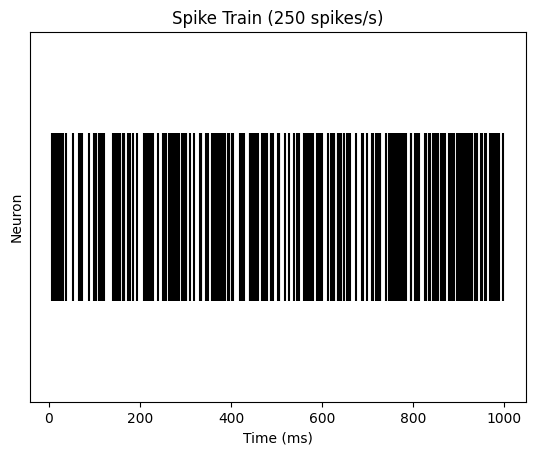

In [409]:
#plotting where x = 1 in an event plot
plt.eventplot(np.where(s_train == 1), lineoffsets=1, linelengths=1, colors='black')
plt.title('Spike Train (250 spikes/s)')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.yticks([])
#plt.savefig('single_spike_train.png')

plt.show()

#### 1.2 Create a raster plot and compute the spike counts

Generate N = 300 spike trains whith firing rate 80 Hz and count the total number of spikes in each of them. Plot 40 of these trials as a rasterplot.

In [410]:
# Helper funciton to generate spike trains
def spike_train_generator(N, Hz) -> list:
    '''This function takes in a number of spike trains to generate, and the firing rate at which to generate them. 
    It retunrs an array of spike trains.'''
    seed = random.seed(0)
    train_array = []
    i = 0
    while i < N:
        s_train = random.binomial(1, Hz/1000, 1000)
        train_array.append(s_train)
        i += 1
    return train_array

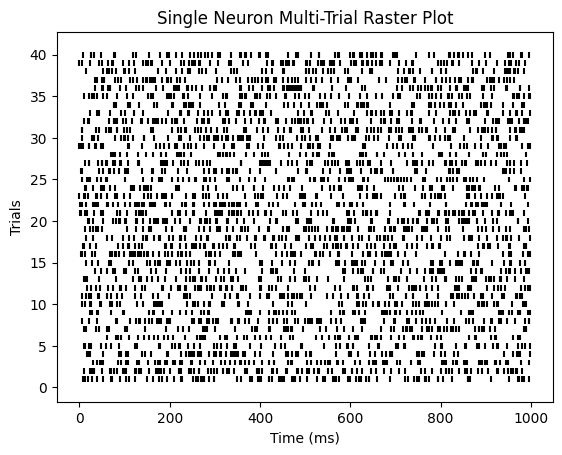

In [411]:
def raster_plot(train_array, trials, stim_begin = None, stim_end = None, start=None, end=None, step=None, title=None) -> plt.eventplot:
    '''This funciton takes in an array of spike trains and a number of trials, and plots them in a raster plot.
    Optionally, it also takes a start, end, and step value to set the x-axis ticks, 
    and a stim_begin and stim_end value to mark the beginning and end of a stimulus.'''

    i = 0
    
    #while loop to plot each spike train
    while i < trials:
        plt.eventplot(np.where(train_array[i] == 1), lineoffsets=i+1, linelengths=0.7, colors='black')
        i += 1
    
    #in case there is a stimulus, mark the start on the plot
    if stim_begin:
        plt.axvline(x=stim_begin, color='r', linestyle='--')
    
    #in case there is a stimulus, mark the end on the plot
    if stim_end:
        plt.axvline(x=stim_end, color='r', linestyle='--')
    
    #if there is a set time frame, set the x-axis ticks
    if start and end and step:
        plt.xticks(np.arange(start, end, step))
    
    plt.title(title)
    plt.xlabel('Time (ms)')
    plt.ylabel('Trials')
    #plt.savefig(f'{title}.png')
    #plt.clf()

raster_plot(spike_train_generator(300, 80), 40, title = 'Single Neuron Multi-Trial Raster Plot')

Plot a histogram of the spike counts for the 300 trials.

In [412]:
# counting the total number of spikes in each spike train
x = spike_train_generator(300, 80)
for i in x:
    print(sum(i))


92
100
90
77
63
68
69
89
71
75
74
83
71
67
75
87
79
83
88
87
90
90
82
75
83
64
90
65
70
88
86
90
70
66
81
82
87
70
91
77
77
81
70
93
73
67
87
72
74
78
92
81
73
73
67
60
80
74
77
85
85
88
79
78
80
76
81
84
86
81
93
78
86
85
83
86
69
75
82
82
85
81
80
79
74
86
97
76
85
93
77
79
84
86
96
74
85
84
93
73
81
88
72
81
101
78
84
83
75
84
77
85
85
87
76
92
77
81
79
84
74
75
91
79
85
85
92
67
68
81
70
85
74
79
70
93
86
79
75
89
83
79
84
81
77
89
74
79
74
77
83
65
82
82
74
72
61
65
87
69
81
69
92
65
82
71
80
87
92
80
66
76
73
69
83
81
91
86
80
71
82
87
93
87
89
76
85
70
90
77
80
66
67
96
101
80
93
81
108
82
76
76
82
95
70
84
66
99
82
77
69
67
96
80
82
81
81
83
79
78
78
83
80
79
82
82
63
82
76
74
78
95
68
73
80
91
63
81
81
78
84
77
67
87
86
69
64
84
67
75
85
83
85
83
71
67
85
73
74
75
84
76
75
78
73
72
80
80
88
86
80
73
91
81
94
96
92
85
68
74
79
71
71
80
67
71
84
78
84
83
58
87
82
82
85
79
77
92
77
69


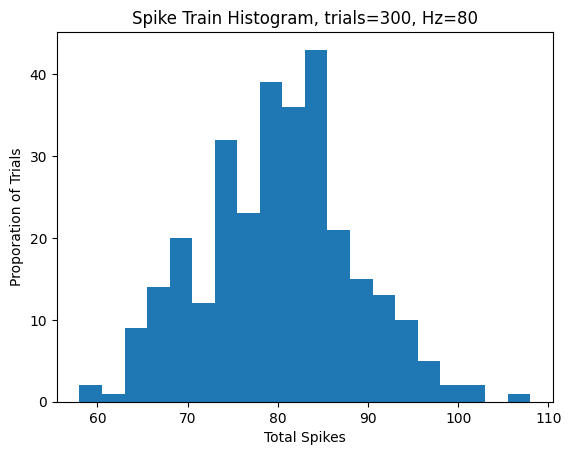

In [413]:
def spike_train_hist(train_array) -> plt.hist:
    '''This function takes in an array of spike trains and plots a histogram of 
    the total number of spikes in each spike train.'''
    i = 0
    hist_array = []

    while i < len(train_array):

        hist_array.append(np.sum(train_array[i]))
        i += 1
    
    plt.hist(hist_array, bins=20)
    plt.title('Spike Train Histogram, trials=300, Hz=80')
    plt.xlabel('Total Spikes')
    plt.ylabel('Proporation of Trials')
    plt.savefig('spike_train_hist.png')
    #plt.show()
    #plt.clf()


spike_train_hist(spike_train_generator(300, 80))

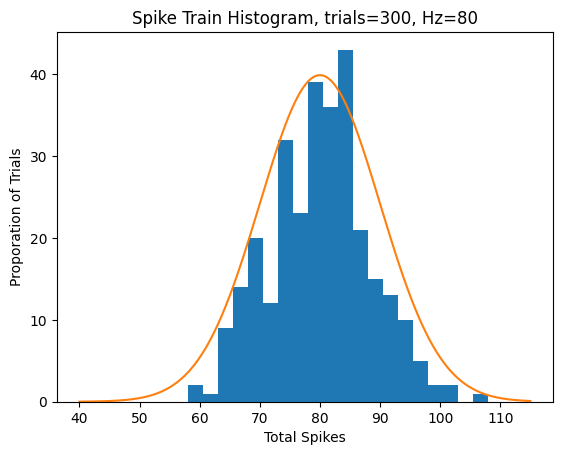

In [414]:
#Showing that the histogram is normally distributed

# Parameters for the normal distribution
mu = 80     # Mean
sigma = 10  # Standard deviation

# Generate a range of x values
x = np.linspace(40, 115, 1000)

# Compute the PDF of the normal distribution
y = norm.pdf(x, mu, sigma) * 1000



fig, ax = plt.subplots()
ax = spike_train_hist(spike_train_generator(300, 80))
ax = plt.plot(x, y)
#plt.savefig('spike_train_hist_normal.png')


#### 1.3 Inter-spike interval distribution

Compute the histogram of interspike intervals for the above spiketrains 

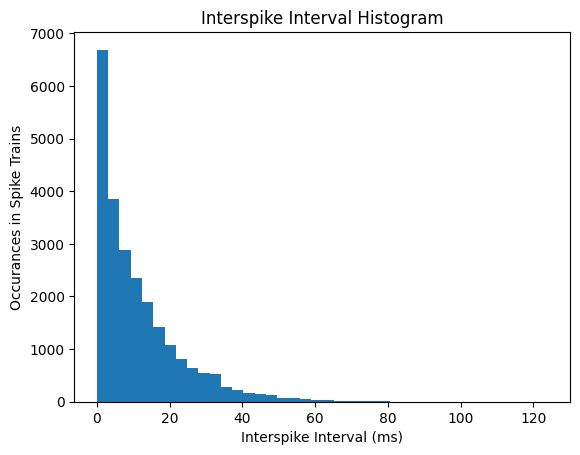

<Figure size 640x480 with 0 Axes>

In [415]:
x = spike_train_generator(300, 80)
def interval_array(spike_train_generator) -> np.array: 
    '''This funciton accepts a spike train generator and returns an array of 
    interspike intervals for the generator.'''
    
    #empty array to store intervals
    intervals = np.array([]) 
    
    #counter to keep track of the interval
    k = 0
    
    #iterates through the spike train generator
    for i in range(len(spike_train_generator)):
         #iterates through the individual spike train 
        for j in (spike_train_generator[i]):   
            
            #If the value is 0, the interval is incremented
            if j == 0: 
              k += 1
            
            # If the value is 1, the interval is appended to the array and the counter is reset
            else:
                intervals = np.append(intervals, k)  
                k = 0
    
    return intervals     
    

plt.hist(interval_array(x), bins=40)
plt.title('Interspike Interval Histogram')
plt.xlabel('Interspike Interval (ms)')
plt.ylabel('Occurances in Spike Trains')
#plt.savefig('interspike_interval_hist.png')

plt.show()
plt.clf()

and compute the Coefficient of Variation, explaining the meaning of the value you obtain. 

CV = sigma_I / [I]

CV = standard_deviation / pop mean

In [416]:
CV = np.std(interval_array(x)) / np.mean(interval_array(x))
CV

1.0301104580524134

## 2. Analysis of Spike Trains

In [417]:
# Load the data
data = loadmat('simdata.mat')

#getting familiar with the data
sptf1=data['spt'][0][0]
sptf1

#data['f1']
len(data['t'][0][40:141])

sptf1[0]
sptf1[1]
sptf1[2]
len(sptf1[3][40:140])
#len(sptf1[4])

#np.where(data['t'][0] == 200)[0][0]
#np.where(data['t'][0] == 700)[0][0]



100

NB! the stimuli are: f1[0][0] = 8.4, [0][1] = 12.0, [0][2] = 15.7, [0][3] = 19.6, [0][4] = 23.6, [0][5] = 25.9, [0][6] = 27.7, [0][7] = 35.0

delta t = 5

#### 2.1 Raster Plot

Plot the raster plot for the first stimulus (f1=8.4 Hz). What do you observe?

40 140


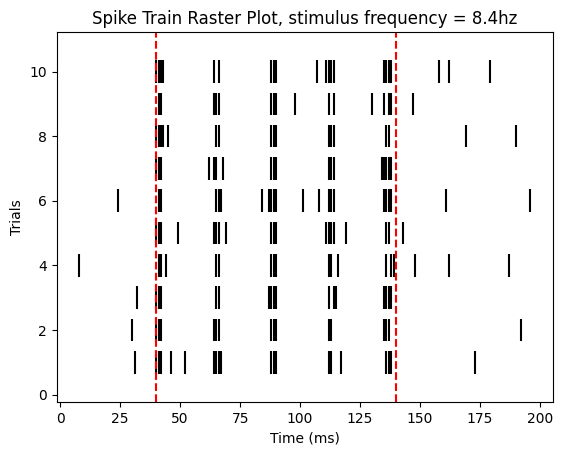

In [418]:
# first stimulus at f1[0][0]
# spt contains the spike trains for the trial at each frequency: they are located at spt[0][frequency index]

#setting the start and end times of stimulus:
start = 200
end = 700

#getting their index:
stim_start = np.where(data['t'][0] == start)[0][0]
stim_end = np.where(data['t'][0] == end)[0][0]

# plotting the spike train for the first trial at the first frequency
raster_plot(sptf1, len(sptf1), stim_start, stim_end, title='Spike Train Raster Plot, stimulus frequency = 8.4hz')

print(stim_start, stim_end)

Observe that there are more spike trains within the timeframe of the stimulus.

### 2.2 Spike Count mean and variance
Count and collect the number of spikes in each spike train, only in the stimulation period

In [419]:
#number of spikes in the first trial at the first frequency
sptf1[0][stim_start:stim_end + 1] #need to add 1 to slice all the way to the stim end time

#total number of spikes in the first trial at the first frequency
total_spikes = np.sum(sptf1[0][stim_start:stim_end + 1])

print(total_spikes)

# number of spikes in each trial at the first frequency
monkey_spike_count = np.array([])
for i in range(len(sptf1)):
    monkey_spike_count = np.append(monkey_spike_count, np.sum(sptf1[i][stim_start:stim_end + 1]))

print(monkey_spike_count)

#Computing the mean:
mean_monkey_spike_count = np.mean(monkey_spike_count)

print(mean_monkey_spike_count)
#Computing the variance:
variance_monkey_spike_count = np.var(monkey_spike_count)

print(variance_monkey_spike_count)
#Compute the mean firing rate:
mean_firing_rate = np.mean(monkey_spike_count) / (700-200) * 1000   #convert to seconds

print(mean_firing_rate)

18
[18. 14. 16. 14. 18. 19. 18. 15. 15. 18.]
16.5
3.25
33.0


### 2.3 Spike density
Count the number of spikes that occur in each ∆t, only in the stimulation period, and plot the spike density in a barplot.

Text(0.5, 1.0, 'Spike Density during stimulus; 8.4hz stimulus')

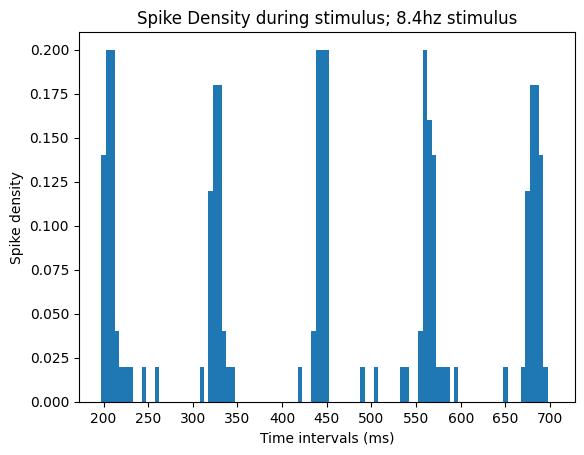

In [420]:
delta_t = 5
number_of_trials = len(sptf1)

#getting the time indicies
time_indicies = data['t'][0][40:141]

#subsetting the spike train for only stim_on times
sptf1_stim = np.array([]).reshape(0, 101)
for i in range(len(sptf1)):
    sptf1_stim = np.vstack((sptf1_stim, sptf1[i][40:141]))

# Lets make a dictionary to store the spike counts at each time interval
interval_counts = {}

#each key is a time during the stimulation period
for i in time_indicies: 
    interval_counts[i] = 0
    
# Now lets get the values for the dictionary from the spike train arrays.
for i in interval_counts:
    
    #gets the original index of the time in the time_indicies array
    index = np.where(time_indicies == i)[0][0] 

    #iterates through the spike train array
    for j in range(len(sptf1_stim)): 
        #spike density : count * 1/delta_t * 1/number of trials.
        
        #adds the spike count at the time to the dictionary
        interval_counts[i] += (np.sum(sptf1_stim[j][index]) * 1/delta_t * 1/number_of_trials) 

plt.bar(interval_counts.keys(), interval_counts.values(), width=5)
plt.xticks(np.arange(200, 750, 50))
plt.xlabel('Time intervals (ms)')
plt.ylabel('Spike density')
plt.title('Spike Density during stimulus; 8.4hz stimulus')
#plt.savefig('spike_density_8.4hz.png')
#plt.clf()


### 2.4 All raster plots together:

Now we want to plot a raster plot for each one of the 8 stimuli and put them together. Plot all the raster plots into the same graph. You can use alternating white and grey colors in the background to indicate the different stimuli, or different colors.

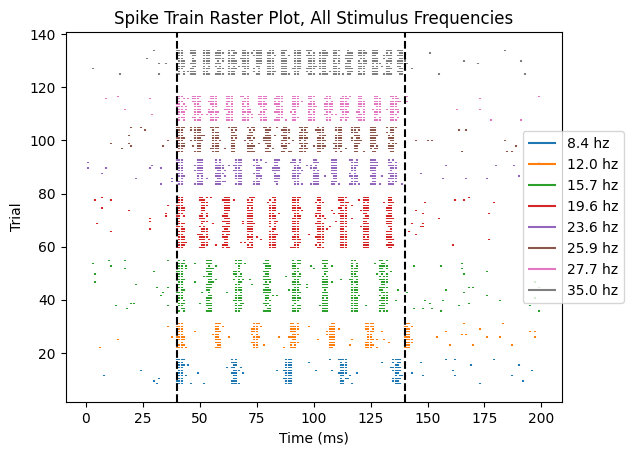

<Figure size 640x480 with 0 Axes>

In [421]:
# getting the arrays for the different frequencies

sptf2=data['spt'][0][1]
sptf3=data['spt'][0][2]
sptf4=data['spt'][0][3]
sptf5=data['spt'][0][4]
sptf6=data['spt'][0][5]
sptf7=data['spt'][0][6]
sptf8=data['spt'][0][7] 


#dictionary of spike trains:
sptf_mega = {8.4 : sptf1, 12.0 : sptf2, 15.7 : sptf3, 19.6 : sptf4, 23.6 : sptf5, 25.9 : sptf6, 27.7 : sptf7, 35.0 : sptf8}

#For some reason, matplotlib wouldn't automatically change the colors of the event plot, so I had to manually cycle through the colors.
colors = itertools.cycle(plt.cm.tab10.colors)

fig, ax = plt.subplots()

k = 0 #offset for the event plot
for i in sptf_mega.keys():
    ax.colors = next(colors)
    for j in range(len(sptf_mega[i])):
        ax.eventplot(np.where(sptf_mega[i][j] == 1), lineoffsets=i+k, linelengths=0.5, label = f'{str(i)} hz', colors=ax.colors)
        k += 1


#plotting start and end times of stimulus:
plt.axvline(x=stim_start, color='black', linestyle='--')
plt.axvline(x=stim_end, color='black', linestyle='--')


# dealing with the duplicated legend labels:
handles, labels = ax.get_legend_handles_labels()

# Create new lists for handles and labels without duplicates
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

# Create the legend with the unique handles and labels, and putting it in a legible position
ax.legend(unique_handles, unique_labels, bbox_to_anchor=(1.14,0.75))

plt.title('Spike Train Raster Plot, All Stimulus Frequencies')
plt.xlabel('Time (ms)')
plt.ylabel('Trial')
#plt.savefig('spike_train_mega_raster.png')
plt.show()
plt.clf()


In a different graph, plot the bar plots for the spike density in the simulation period (as done in 2.3), for each one of the rasterplot.

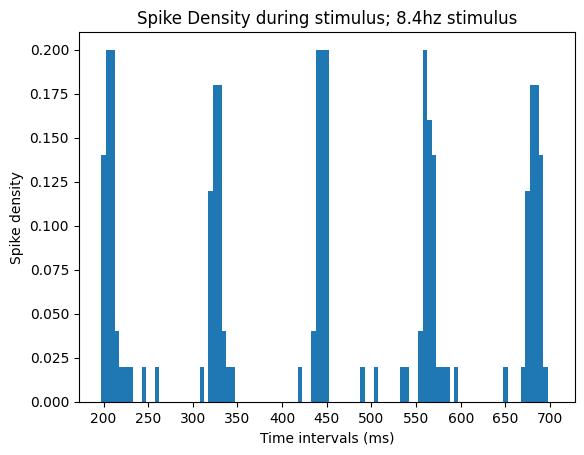

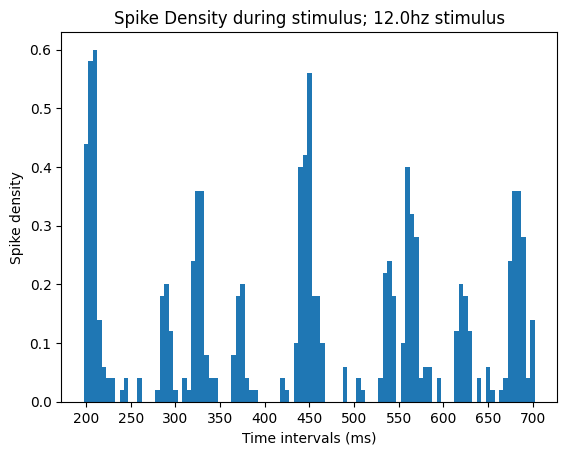

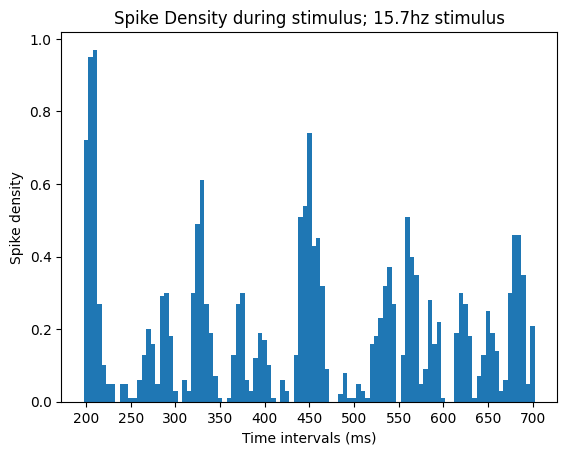

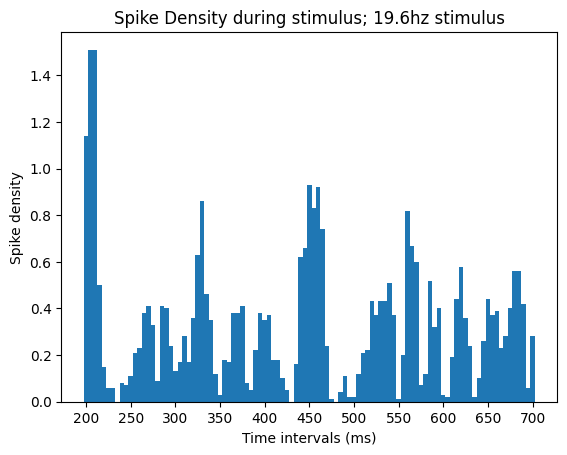

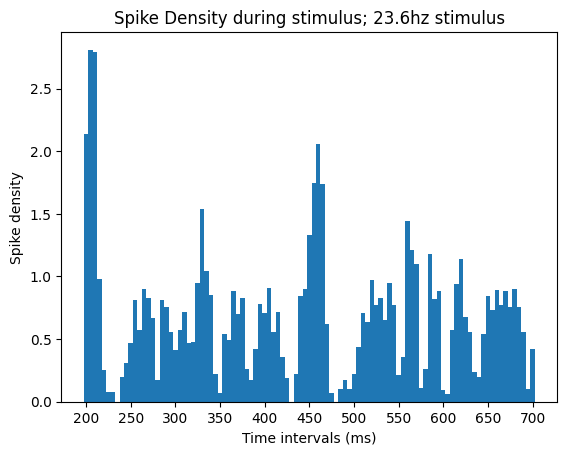

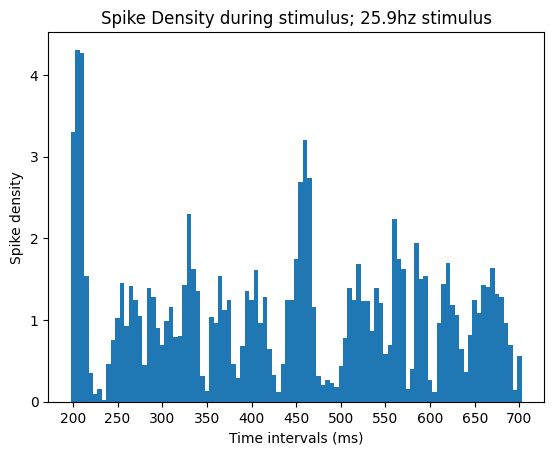

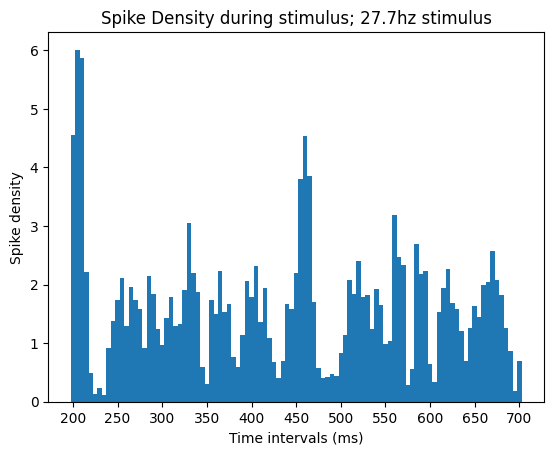

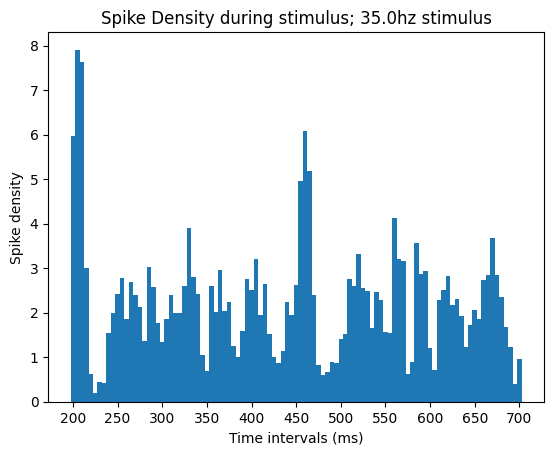

In [422]:
#Want to do the same thing as before, but looping throught the frequencies. 
delta_t = 5

#getting the time indicies
time_indicies = data['t'][0][40:141]

# Lets make a dictionary to store the spike counts at each time interval
interval_counts = {}
for i in time_indicies: #each key is the time index, each value is the spike count at that time index
    interval_counts[i] = 0

#looping through the spike train arrays at different frequencies
trial_stim = np.array([]).reshape(0, 101) # empty array for the spike train at each frequency

density_figs = [] #list to store the created figures

#iterating through the frequencies dictionary
for i in sptf_mega: 
    fig, ax = plt.subplots()
    for j in range(len(sptf_mega[i])):
        
        #stacking the spike train for each trial at each frequency in the stim time range
        trial_stim = np.vstack((trial_stim, sptf_mega[i][j][40:141])) 
    
    #for each time index
    for k in interval_counts: 
        
        #get the index in the original time array that corresponds to the key in the dictionary
        index = np.where(time_indicies == k)[0][0] 
    
        #for each trial at the frequecy i
        for j in range(len(trial_stim)): 
            #spike density : count * 1/delta_t * 1/number of trials.

            #the value of the dictionary at k is incremented by the spike density of the trial at that time index.
            interval_counts[k] += (np.sum(trial_stim[j][index]) * 1/delta_t * 1/len(sptf_mega[i])) 
            
    
    ax.bar(interval_counts.keys(), interval_counts.values(), width=5)
    ax.set_xticks(np.arange(200, 750, 50))
    ax.set_title(f'Spike Density during stimulus; {str(i)}hz stimulus')
    ax.set_xlabel('Time intervals (ms)')
    ax.set_ylabel('Spike density')
    #plt.savefig(f'spike_density_{str(i)}hz.png')
    #plt.show()
    #plt.clf()
    density_figs.append(fig) #store in figs list

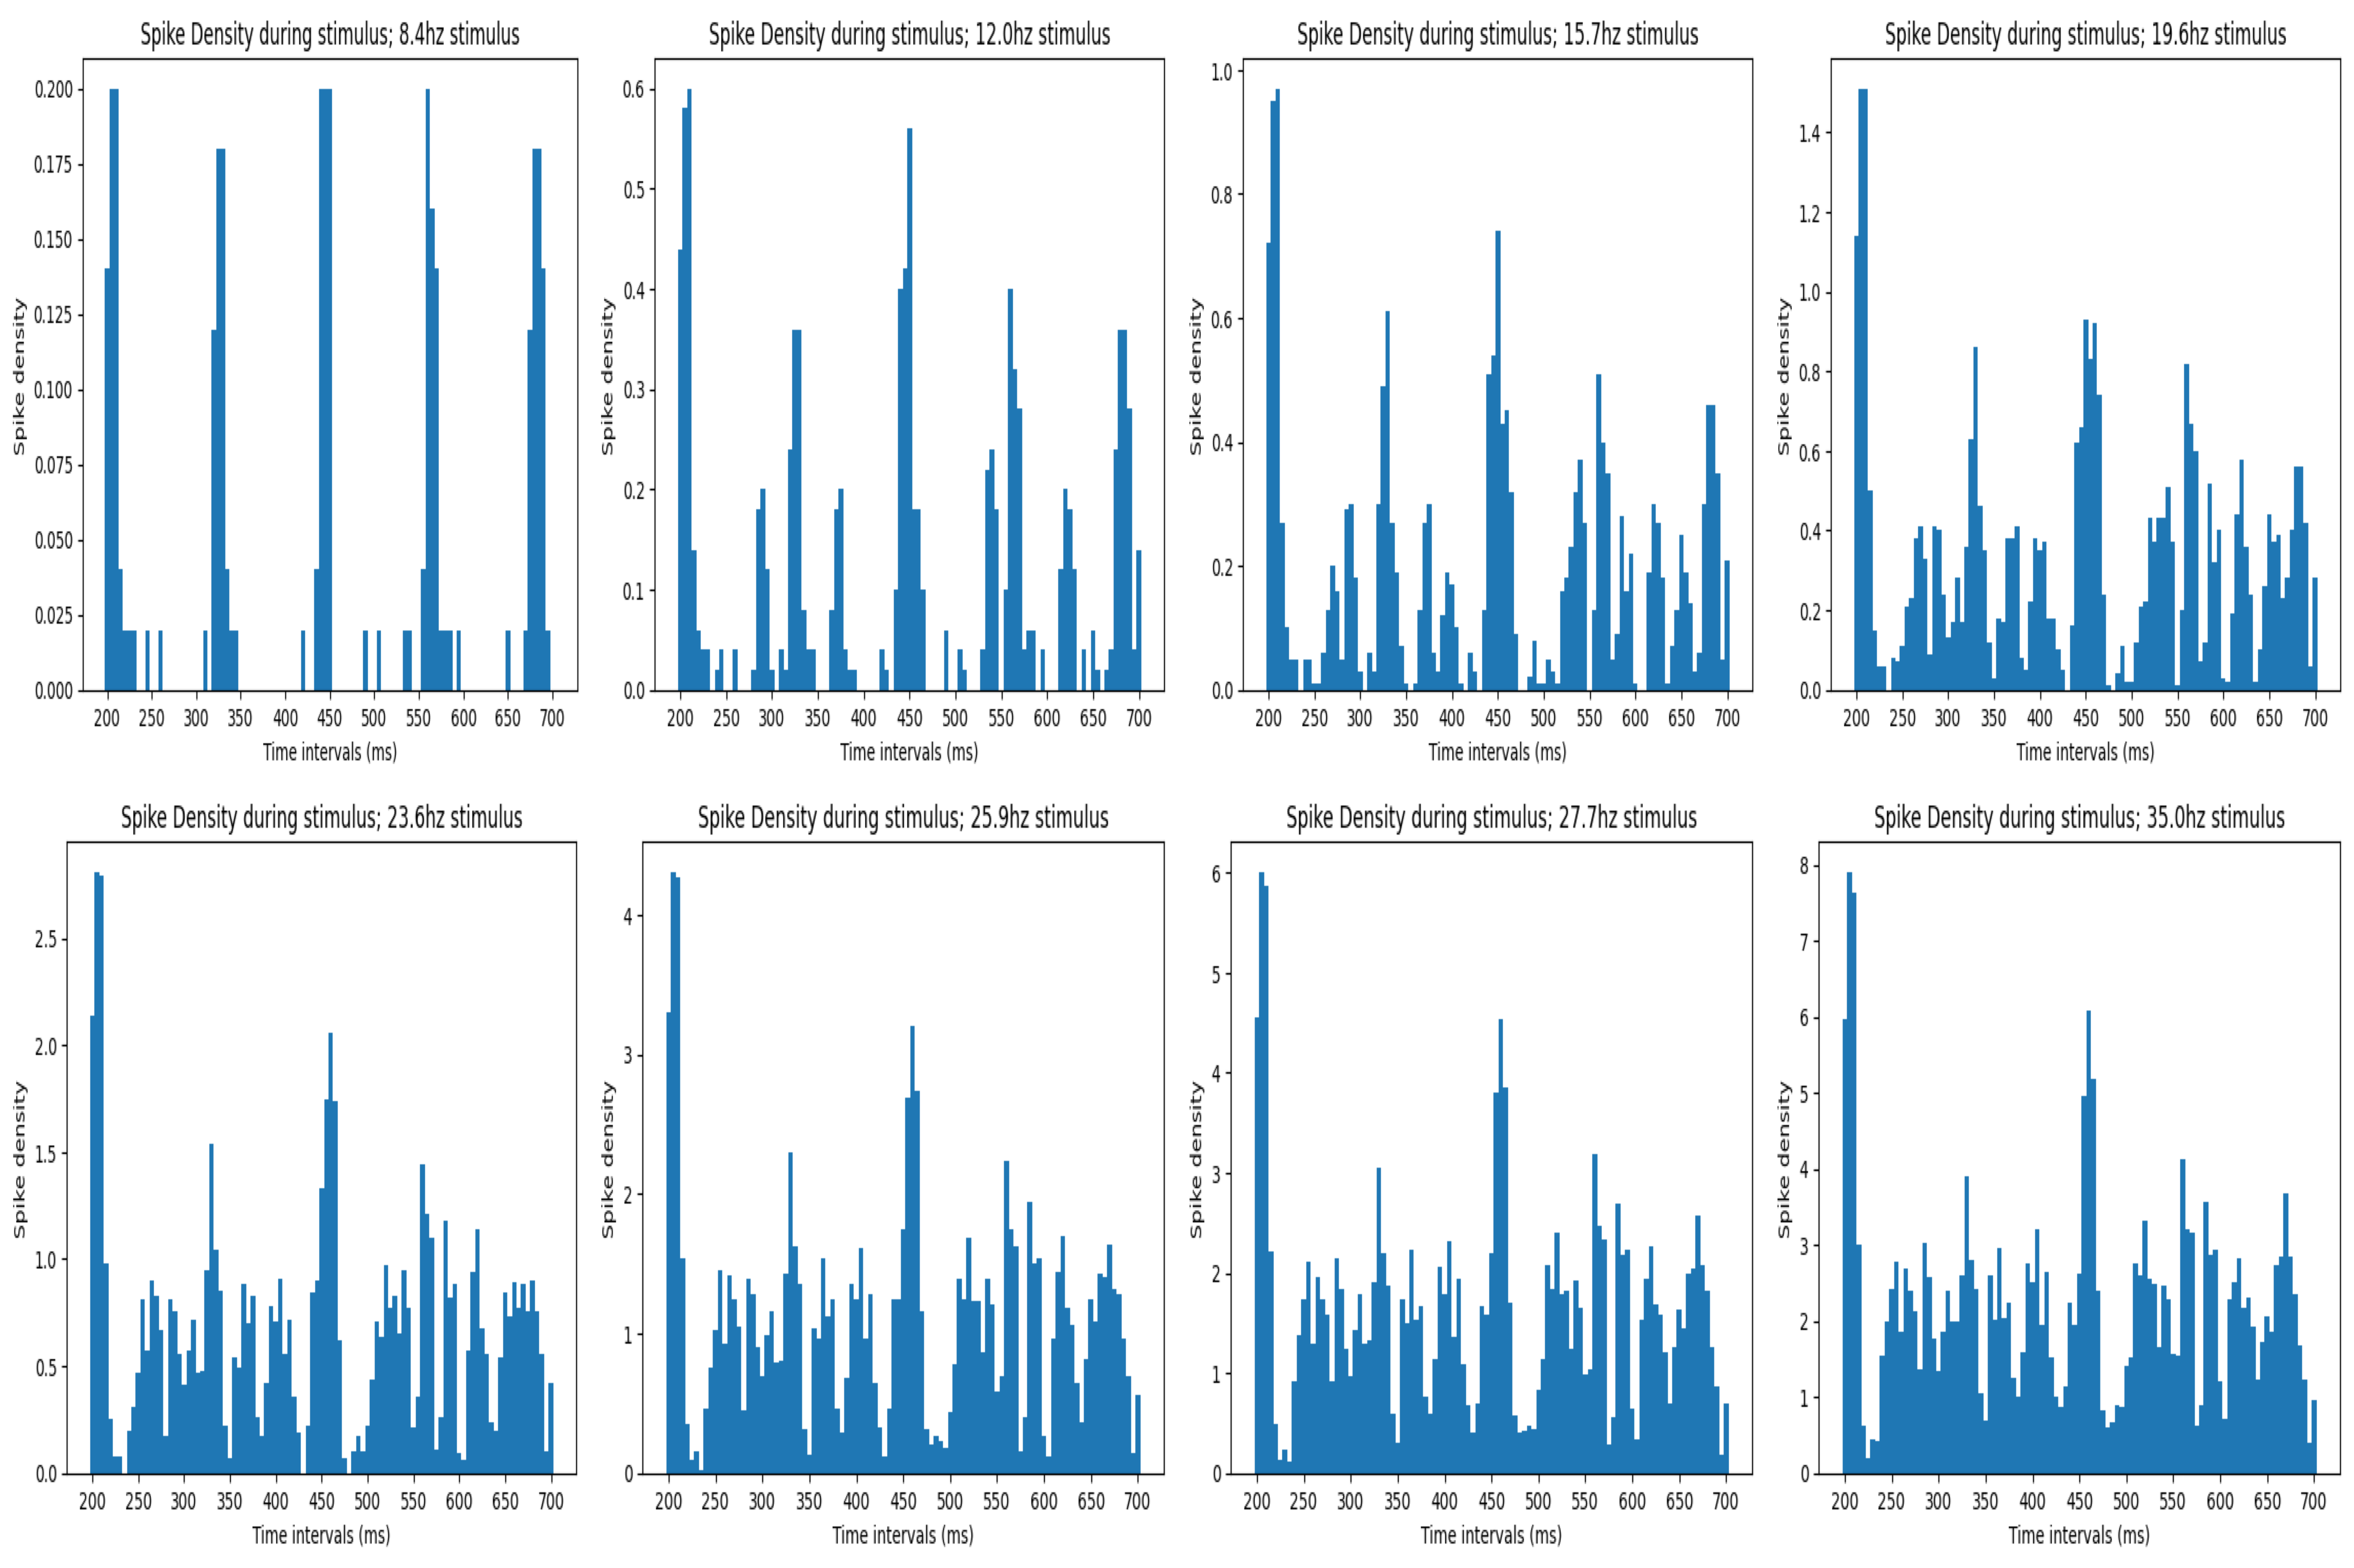

<Figure size 640x480 with 0 Axes>

In [423]:
# plot all the plots in one big figure

## Create a figure and axes
fig, axes = plt.subplots(2, 4, figsize=(60, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the figures and plot them on the corresponding axes
for i in range(len(density_figs)):
    axes[i].imshow(density_figs[i].canvas.renderer.buffer_rgba(), aspect='auto')
    axes[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
#plt.savefig('spike_density_all.png')
plt.clf()

### 2.5 Mean and Variance of Spike Counts

For each raster plot, compute the spikes count, its mean and variance.

Compute the mean firing rates

In [424]:
# number of spikes in each trial at each frequency

#dictionary to store the spike count at each frequency
spike_count_per_freq = {} 

#iterating through the frequencies
for i in sptf_mega: 

    #empty array to store the spike count at each trial for each frequency
    spike_count_per_freq[i] = np.array([]) 

    #iterating through the spike train array at each frequency
    for j in range(len(sptf_mega[i])): 
        spike_count_per_freq[i] = np.append(spike_count_per_freq[i], 
                                            np.sum(sptf_mega[i][j][stim_start:stim_end + 1]))

print(f'spike count for each frequency: {spike_count_per_freq}')

#Computing the mean: (same idea as the one above)
mean_spike_count_per_freq = {}
for i in spike_count_per_freq.keys():
    mean_spike_count_per_freq[i] = np.mean(spike_count_per_freq[i])

print(f'mean spike count for each frequency: {mean_spike_count_per_freq}')

#Computing the variance:
var_spike_count_per_freq = {}
for i in spike_count_per_freq.keys():
    var_spike_count_per_freq[i] = np.var(spike_count_per_freq[i])

print(f'variance of the spike count for each frequency: {var_spike_count_per_freq}')

#Compute the mean firing rate:
mean_firing_rate_per_freq = {}
for i in spike_count_per_freq.keys():
    mean_firing_rate_per_freq[i] = np.mean(spike_count_per_freq[i]) / (700 - 200) * 1000

print(f'mean firing rate for each frequnecy: {mean_firing_rate_per_freq}')


spike count for each frequency: {8.4: array([18., 14., 16., 14., 18., 19., 18., 15., 15., 18.]), 12.0: array([20., 20., 20., 21., 21., 18., 21., 19., 22., 17.]), 15.7: array([24., 23., 24., 23., 24., 23., 23., 25., 23., 24., 24., 23., 28.,
       26., 19., 23., 24., 21., 27., 21.]), 19.6: array([30., 30., 31., 32., 32., 31., 30., 26., 30., 31., 29., 32., 29.,
       27., 31., 29., 29., 31., 28., 30.]), 23.6: array([38., 34., 32., 39., 35., 34., 36., 40., 35., 33.]), 25.9: array([36., 38., 39., 40., 43., 41., 41., 36., 36., 45.]), 27.7: array([39., 44., 38., 42., 42., 43., 42., 44., 43., 41.]), 35.0: array([55., 47., 55., 49., 57., 52., 54., 57., 54., 49.])}
mean spike count for each frequency: {8.4: 16.5, 12.0: 19.9, 15.7: 23.6, 19.6: 29.9, 23.6: 35.6, 25.9: 39.5, 27.7: 41.8, 35.0: 52.9}
variance of the spike count for each frequency: {8.4: 3.25, 12.0: 2.09, 15.7: 3.8400000000000007, 19.6: 2.4899999999999993, 23.6: 6.239999999999999, 25.9: 8.65, 27.7: 3.5599999999999996, 35.0: 11.09}
m

plot the tuning curve of the neuron, i.e., its average firing rate (=spike count / sec) against the stimulus frequency.


Text(0, 0.5, 'Mean Firing Rate (spikes/s)')

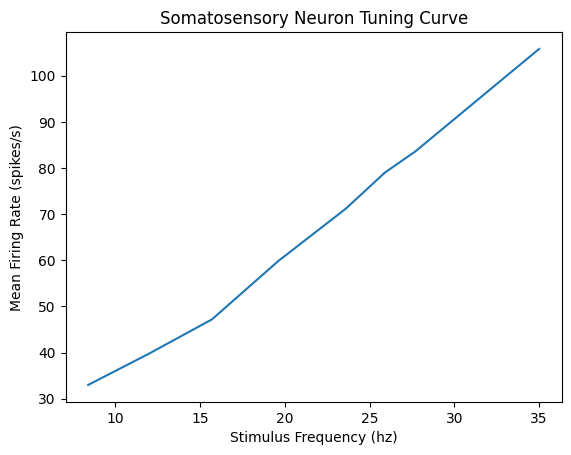

In [425]:
#Tuning Curve:

plt.plot(mean_firing_rate_per_freq.keys(), mean_firing_rate_per_freq.values())
plt.title('Somatosensory Neuron Tuning Curve')
plt.xlabel('Stimulus Frequency (hz)')
plt.ylabel('Mean Firing Rate (spikes/s)')
#plt.savefig('tuning_curve.png')

# Homework Part 2

## 1. Integrate and Fire

### 1.1 Simulate the dynamics of the membrane potential.

We will start by simulating the voltage across a neuron’s membrane when a current I = 1nA is injected. For a passive membrane, the voltage is given by the differential equation.

C = 1nF , gL = 0.1µS, EL = −70mV 

Implement the Euler Method and plot the dynamics of the membrane potential V (t). Use as initial condition V (0) = EL, and choose a time step ∆t = 1ms. Iterate the model for 100ms (i.e. for 100 time steps).

FYI: V(t + delta_t) = V(t) + (dV(t)/dt)*delta_t

C*(dV(t)/dt) = g_L(E_L - V(t)) + I

tf

V(t+delta_t) = V(t) + ((g_L(E_L - V(t)) + I) / C) * delta_t

In [426]:
capacitance = 1
conductance = 0.1
reversal_potential = -70
time = 100
delta = 1
threshold = -63
max = 30

neuron_characteristics = {'c': capacitance, 'g_l' : conductance, 'e_l' : reversal_potential, 'th' : threshold, 'max' : max}

-70.00000000000001

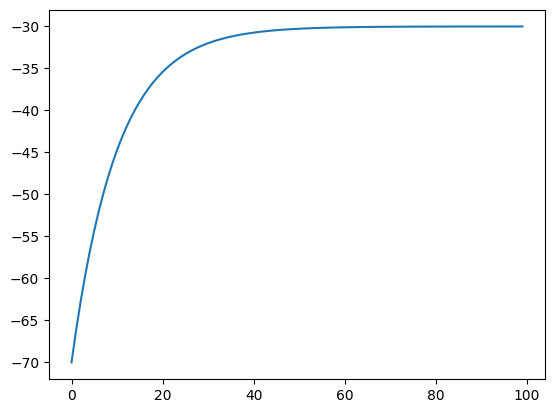

In [427]:
#Sanity check for analytical ODE solution
t = np.arange(0, 100, 1)
y = -70 - (((np.exp(-0.1*(t + (-10*np.log(4))))-4)/0.1))
plt.plot(t, y)
y[0]

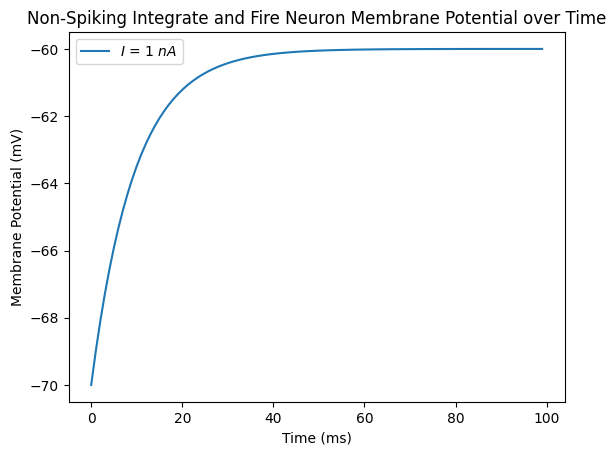

In [428]:
def integrate_and_fire_neuron(neuron, current_array, time, dt) -> plt.plot:
    '''This function generates an array of membrane potentials for an integrate and fire neuron given a dicitonary of neuron characteristcs, 
    an array of currents, a time period, and a time interval. 
    It then plots the membrane potential over time.'''
    
    #initialize the potential_array
    potential_array = np.zeros(int(time/dt))
    
    #set the initial potential to the resting potential
    potential_array[0] = neuron['e_l']

    #initialize plot
    fig, ax = plt.subplots()

    #loop through the curent array
    for j in range(len(current_array)):

        #loop through the potential array from 1 to the end
        for i in range(1, len(potential_array)):

            # implementing integreate and fire neuron model
            potential_array[i] = potential_array[i-1] + \
                (((1/neuron['c']) * neuron['g_l'] * (neuron['e_l'] - potential_array[i-1]) + current_array[j]) * \
                 dt)

        #plot the potential array 
        ax.plot(potential_array, label=(f"$I$ = {str(current_array[j])} $nA$")) 
    
    # Display the legend
    ax.legend()
    plt.title('Non-Spiking Integrate and Fire Neuron Membrane Potential over Time')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    #plt.savefig(f'lif_membrane_potential_{str(current_array)}.png')

current = [1]
integrate_and_fire_neuron(neuron_characteristics, current, time, delta)

### 1.2 Change I

Change the injected current and explain how the dynamics vary

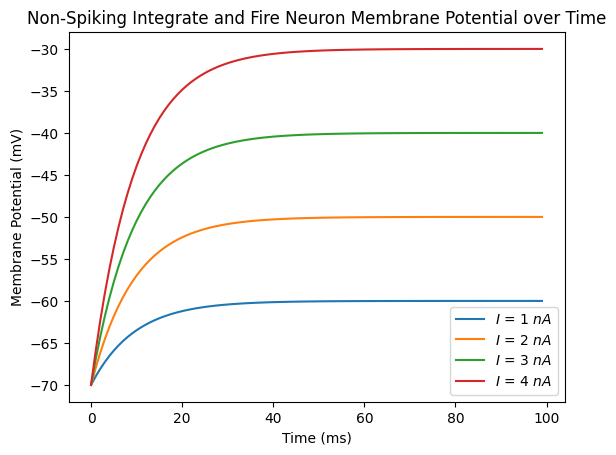

In [429]:
I_array = np.arange(1, 5, 1)
I_array
integrate_and_fire_neuron(neuron_characteristics, I_array, time, delta)

We see that as the current increases, the maximum Voltage also increases.

### 1.4 Spiking mechanism

Assume that every time when the voltage V surpasses a threshold Vth, the neuron fires an action potential and the membrane voltage is reset to V = EL. Introduce this spiking mechanism in (1.1) and simulate again the dynamics of the membrane potential.

Use Vth = −63mV and Vmax = +30mV , denoting the maximum voltage reached during the spike.

In [430]:
def integrate_and_fire_spike_neuron_plot(neuron, current_array, time, dt) -> plt.plot:
    '''This function implements the integrate and fire neuron model along with the spike reset mechanism.
    It takes in a dictionary of neuron characteristics, an array of currents, a time period, and a time interval.
    it saves the plot of the membrane potential over time.'''

    #initialize the potential_array
    potential_array = np.zeros(int(time/dt))

    #set the initial potential to the resting potential
    potential_array[0] = neuron['e_l']


    #initalize the plot
    fig, ax = plt.subplots()

    #loop through the current array
    for j in range(len(current_array)):

        #loop through the potential array from 1 to the end
        for i in range(1, len(potential_array)):

            #if the potential is at the max, it is reset to the resting potential    
            if potential_array[i-1] == neuron['max']: 
                potential_array[i] = neuron['e_l']

            # if the potential is below the threshold, it is incremented by the potential at the previous time index plus the current
            elif potential_array[i - 1] < neuron['th']: 
                potential_array[i] = potential_array[i-1] + \
                    (((1/neuron['c']) * neuron['g_l'] * (neuron['e_l'] - potential_array[i-1]) + current_array[j]) * \
                     dt)   
            
            #if the potential is at or above the threshold, it is set to the max
            elif potential_array[i-1] >= neuron['th']: 
                potential_array[i] = neuron['max']

        #plot the potential array    
        ax.plot(potential_array, label=(f"$I$ = {str(current_array[j])} $nA$"))  # Add label=str(I[j]) to include I[j] in the legend

    #Format the plot    
    ax.yaxis.set_ticks(np.arange(neuron['e_l'], neuron['max'] + 1, 10))
    
    #Add legend() to display the legend 
    ax.legend(loc='upper right')
    ax.set_title('Integrate and Fire Neuron Membrane Potential over Time')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Membrane Potential (mV)')  

    #plt.savefig(f'lif_spike_membrane_potential_{str(current_array)}.png')



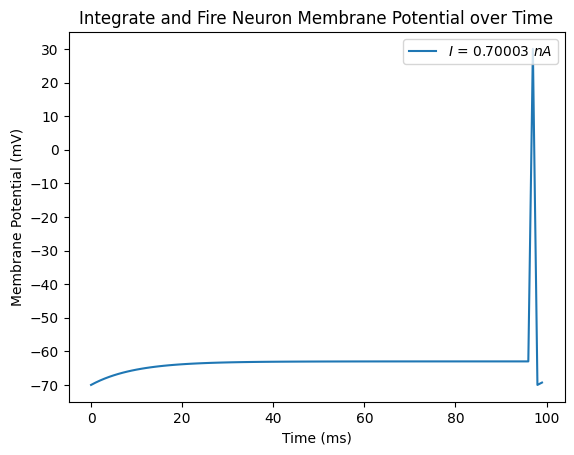

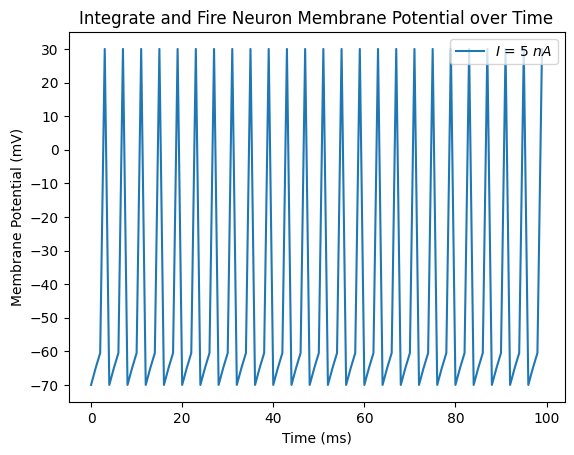

In [431]:
integrate_and_fire_spike_neuron_plot(neuron_characteristics, [0.70003], time, delta) 
integrate_and_fire_spike_neuron_plot(neuron_characteristics, [5], time, delta)

### 1.5 How many spikes?

How many spikes do you get within 100ms?

Change the input current and see: 

at what current does the neuron start firing;

how the current affects the number of spikes within 100ms. 


The Neuron starts firing at 0.700022957nA; gets a full spike and reversal at 7.0003nA.




Plot the tuning curve of this neuron, i.e., the number of spikes within 100ms as a funciton of the input current I.

Text(0.5, 1.0, 'Integrate and Fire Neuron Tuning Curve')

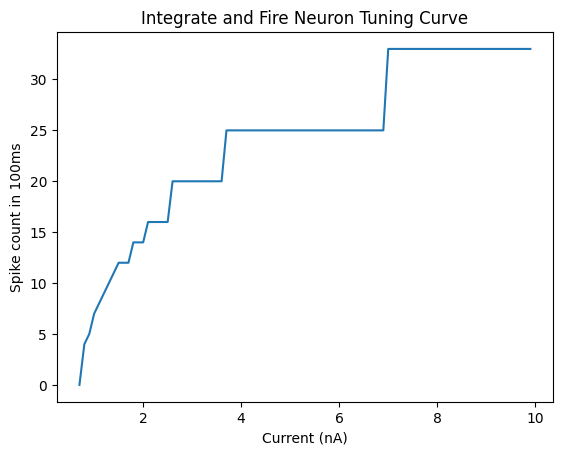

In [432]:
tuning_array = np.array([])
current_array = np.arange(0.7, 10, 0.1)

def integrate_and_fire_spike_neuron_array(neuron, current_array, time, dt) -> np.array:
    '''This function implements the integrate and fire neuron model along with the spike reset mechanism.
    It takes in a dictionary of neuron characteristics, an array of currents, a time period, and a time interval.
    It returns an array of membrane potentials over time for each current in the current array.'''
    
    potential_arrays = np.array([]).reshape(0, int(time/dt))

    potential_array = np.zeros(int(time/dt))

    potential_array[0] = neuron['e_l']
    
    for j in range(len(current_array)):

        for i in range(1, len(potential_array)):

            #if the potential is at the max, it is reset to the resting potential    
            if potential_array[i-1] == neuron['max']: 
                potential_array[i] = neuron['e_l']

            # if the potential is below the threshold, it is incremented by the potential at the previous time index plus the current
            elif potential_array[i - 1] < neuron['th']: 
                potential_array[i] = potential_array[i-1] + \
                    (((1/neuron['c']) * neuron['g_l'] * (neuron['e_l'] - potential_array[i-1]) + current_array[j]) * \
                     dt)   
                
            #if the potential is at or above the threshold, it is set to the max
            elif potential_array[i-1] >= neuron['th']: 
                potential_array[i] = neuron['max']

        # stack the arrays
        potential_arrays = np.vstack((potential_arrays, potential_array))

    return potential_arrays

#store potential_arrays in x
x = integrate_and_fire_spike_neuron_array(neuron_characteristics, current_array, time, delta)

#initialize the array of spike counts, shape of the array is the length of the potential array
spikes_count = np.array([]).reshape(0, len(x))

#loop through the potential arrays
for i in range(len(x)):
    
    #spike count is the number of times the potential is at the max
    spikes_count = np.append(spikes_count, np.count_nonzero(x[i] == 30))

plt.plot(current_array, spikes_count)
plt.xlabel('Current (nA)')
plt.ylabel('Spike count in 100ms')
plt.title('Integrate and Fire Neuron Tuning Curve')
#plt.savefig('ifn_tuning_curve.png')

### 1.6 Noise and spike trains

To be more realistic, introduce a 'white noise term' into the simulation

sigm * eta(t)

sigma determines the amount of noise and eta(t) is a random variable from a normal distribution with mean 0 and variance 1. 

Remember to inlcude sqrt(dt) in the simulation, so that is independent of the time step. 

Create some spike trains with different noise magnited and represent them in a raster plot.

In [433]:
#spike trains with different noise magnitudes. 
# setting up variables:
sigma = np.arange(0, 1, 0.2)
sigma = np.round(sigma, 1)

In [434]:
# Helper function to generate the arrays of noise

def noise_arrays_generator(sigma, time, delta) -> np.array:
    '''Accepts an array of noise magnitudes, a time delta, and a time. 
    Returns an array of noise arrays.'''
    seed = random.seed(0)

    #initialize the array to store the noise arrays
    noise_arrays = np.array([]).reshape(0, time) 
    
    for i in range(len(sigma)):
       
       # generate the noise array with the given sigma and gaussian. 
        noise = sigma[i] * random.normal(loc=0, scale=1, size=time) * np.sqrt(delta) 

        # stack the noise arrays
        noise_arrays = np.vstack((noise_arrays, noise))
    
    return noise_arrays


In [435]:
#Helper funciton to generate the noisy potential arrays

def noisy_potential_arrays_generator(neuron, sigma, time, delta, current) -> np.array:
    '''Accepts a dictionary of neuron characteristics, a noise magnitude, a time, a time delta, 
    and a current. Returns an array of potential arrays.'''
     
    # generate the noise arrays w/ helper function
    noise_arrays = noise_arrays_generator(sigma, time, delta) 

    #initialize the array to store the potential arays
    potential_arrays = np.array([]).reshape(0, int(time/delta)) 

    #initialize the array to store the potential at each time index
    potential_array = np.zeros(int(time/delta)) 

    #set initial potential
    potential_array[0] = neuron['e_l'] 
     
    #loop through the noise arrays
    for j in range(len(noise_arrays)):

        #loop through the potential array from 1 to the end
        for i in range(1, len(potential_array)):
            
            #if the potential is at the max, it is reset to the resting potential
            if potential_array[i-1] == neuron['max']: 
                potential_array[i] = neuron['e_l']
            
            # if the potential is below the threshold, it is incremented by the potential at the previous time index plus the current
            elif potential_array[i - 1] < neuron['th']: 
                potential_array[i] = potential_array[i-1] + \
                    (((1/neuron['c']) * neuron['g_l'] * (neuron['e_l'] - potential_array[i-1]) + current) * \
                     delta + \
                        noise_arrays[j][i])
            
            #if the potential is at or above the threshold, it is set to the max
            elif potential_array[i-1] >= neuron['th']: 
                potential_array[i] = neuron['max']
          
        potential_arrays = np.vstack((potential_arrays, potential_array))
     
    return potential_arrays

In [436]:
# Function to generate the noisy spike trains

def noisy_spike_train_generator(neuron, time, delta, current, sigma_array) -> dict: 
    '''Accepts a dictionary of neuron characteristics, lenght of time, time delta, a current, and an array of noise magnitudes. 
    Returns a dictionary where keys are sigma values, and values are the spike train arrays.'''

    # use the helper function to generate the noisy potential arrays
    noisy_potentials = noisy_potential_arrays_generator(neuron, sigma_array, time, delta, current)

    #initialize the dictionary to store the spike train arrays for each sigma value
    sigma_spike_train = {} 

    #initialize the array to store the spike train arrays for each sigma value
    for i in sigma_array:
        sigma_spike_train[i] = np.array([]) 
    
    #initialize the array to store the spike train arrays for each sigma value
    spike_trains = np.zeros((len(noisy_potentials), len(noisy_potentials[0])))

    #loop through the noisy potential arrays
    for i in range(len(noisy_potentials)):
        
        #loop through each array in the array
        for j in range(len(noisy_potentials[i])):

            #if the item is at the max, the spike train is 1
            if noisy_potentials[i][j] == neuron['max']:
                spike_trains[i][j] = 1

            #else 0
            else:
                spike_trains[i][j] = 0
    
    
    #populate the dictionary with the spike train arrays
    for i, j in enumerate(sigma_spike_train):
        sigma_spike_train[j] = spike_trains[i]
        
        

    return sigma_spike_train

## TODO: see if I can fix the rasterplot function to be more ameanabel to customization. B/c right now it is useless

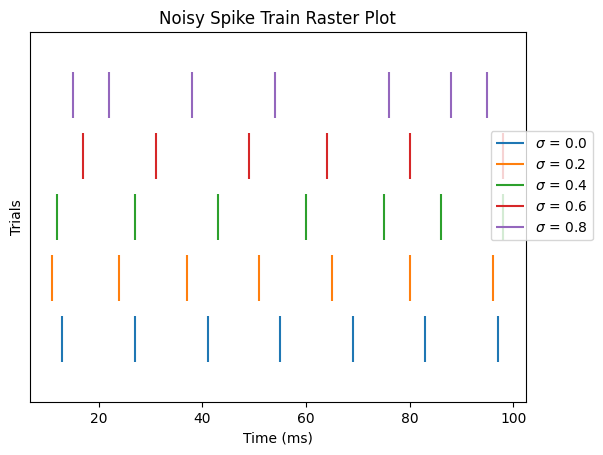

<Figure size 640x480 with 0 Axes>

In [437]:

#save the noisy spike trains to an object
nst = noisy_spike_train_generator(neuron_characteristics, time, delta, 1, sigma)

#For some reason, matplotlib wouldn't automatically change the colors of the event plot, so I had to manually cycle through the colors.
colors = itertools.cycle(plt.cm.tab10.colors)

fig, ax = plt.subplots()

#iterate throught the dictionary of spike trains and plot them 
for i in nst:
    ax.eventplot(np.where(nst[i] == 1), 
                 lineoffsets= i + 1, 
                 linelengths = 0.15, 
                 label = f'$\sigma$ = {str(i)}', 
                 color = next(colors))

# dealing with the duplicated legend labels:
handles, labels = ax.get_legend_handles_labels()

# Create new lists for handles and labels without duplicates
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

# Create the legend with the unique handles and labels, and putting it in a legible position
ax.legend(unique_handles, unique_labels, bbox_to_anchor=(1.15,0.75))
ax.set_title('Noisy Spike Train Raster Plot')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Trials')
ax.set_yticks([])

plt.show()
#plt.savefig('noisy_spike_train_raster.png')
plt.clf()

create a time-varying stimulus I(t): this means that the injected current is no more constant, but it changes at each time step of the dynamics. The simplest time-varying input takes the form: I = np.zeros(T ), I[Ton : Tof f ] = 1, meaning that the input is on for a limited period. Invent a time-varying input and see how this impact the generation of spikes. Use a low level of noise. Plot the membrane potential dynamics, as well as the time-varying input.

In [438]:
#Helper function to make the time-varying current
    
def rand_walk_current(start_current, time) -> np.array:
    '''This function creates an array of lenght time, given a starting current and a time.
    It generates the array by implementing a random walk witha 50% chance of going down and an 50% chance of going up.
    The array is initialized with the start_current value.'''
    #set a random seed
    seed = random.seed(0)

    #set the starting current from user
    start_current = start_current

    #initialize the array with the starting current
    current_array = np.array([start_current])

    # get random numbers, n = time
    rand_numbers = np.random.random(time)

    #if the random number is less than 0.5, the current goes down
    down_probability = rand_numbers < 0.5
    
    # if the random number is greater than 0.5, the current goes up
    up_probability = rand_numbers > 0.5
    
    #iterate through the random numbers
    for downers, uppers in zip(down_probability, up_probability):
        #if the current is at 0, it can only go up
        down = downers and current_array[-1] > 0
        
        #if the current is at 2x the starting current, it can only go down
        up = uppers and current_array[-1] < start_current * 2

        #append the current to the array
        current_array = np.append(current_array, (current_array[-1] - down + up))

    return current_array

In [439]:

def noisy_rand_current_membrane_potentials(neuron, sigma, start_current, time, delta) -> tuple[np.array, np.array]:
    '''Accepts a dictionary of neuron characteristics, a noise magnitude, a time, a time delta, 
    and a start current. Returns an array of potentials with alternating currents (random walk).'''
    
    #initialize the array to store the potential at each time index 
    potential_array = np.zeros(int(time/delta)) 
    
    #set initial potential
    potential_array[0] = neuron['e_l']
    
    #getting noise term at each time-step
    noise = sigma * random.normal(loc=0, scale=1, size=time) * np.sqrt(delta) 
    
    #generate the random walk current array
    current_array = rand_walk_current(start_current, time) 
    
    #populate the potential array
    for i in range(1, len(potential_array)):
            
            #if the potential is at the max, it is reset to the resting potential
            if potential_array[i-1] == neuron['max']: 
                potential_array[i] = neuron['e_l']
            
            # if the potential is below the threshold, it is incremented by the potential at the previous time index plus the current
            elif potential_array[i - 1] < neuron['th']: 
                potential_array[i] = potential_array[i-1] + \
                    (((1/neuron['c']) * neuron['g_l'] * (neuron['e_l'] - potential_array[i-1]) + current_array[i]) * \
                     delta + \
                        noise[i]) * delta
            
            #if the potential is at or above the threshold, it is set to the max
            elif potential_array[i-1] >= neuron['th']: 
                potential_array[i] = neuron['max']
          
    # return both the potential_array and current_array so we can plot them
    return potential_array, current_array

z = noisy_rand_current_membrane_potentials(neuron_characteristics, 0.001, 1, time, delta)


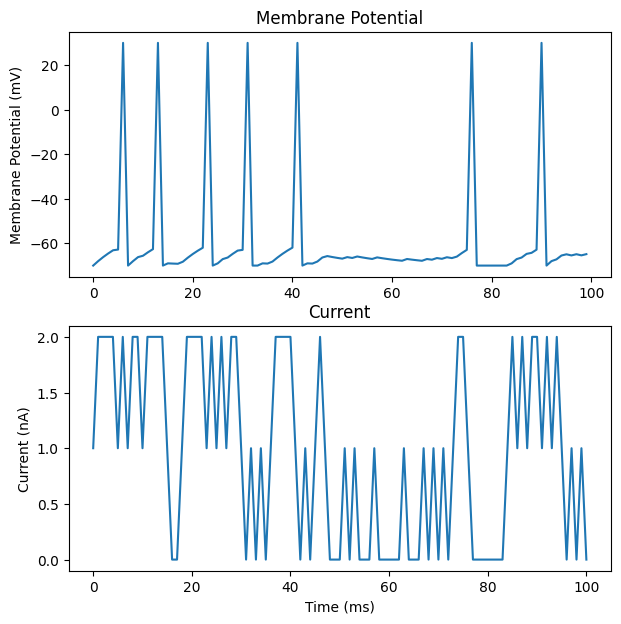

<Figure size 640x480 with 0 Axes>

In [440]:
#object to store the potential and current arrays
z = noisy_rand_current_membrane_potentials(neuron_characteristics, 0.001, 1, time, delta)

#plotting them side by side
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(z[0])
ax1.set_title('Membrane Potential')

ax1.set_ylabel('Membrane Potential (mV)')

ax2.plot(z[1])
ax2.set_title('Current')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Current (nA)')

fig.set_size_inches(7, 7)
#plt.savefig('ifn_random_walk.png')
plt.show()

plt.clf()

# The Hodking-Huxley model

### 2.1

In [441]:
HH_neuron = {'c': 1, 'g_l' : 0.3, 'e_l' : -54.4, 'g_k' : 36, 'e_k' : -77, 'g_na' : 120, 'e_na' : 50}

In [442]:
# helper functions: opening and closing rate for the potassium channel

def alpha_n(v) -> float:
    '''This function takes in a membrane potential and returns 
    the opening rate for the potassium channel.'''

    return ((0.01 * (v + 55)) / (1 - np.exp(-0.1 * (v + 55))))

def beta_n(v) -> float:
    '''This function takes in a membrane potential and returns 
    the closing rate for the potassium channel.'''
    
    return (0.125 * np.exp(-0.0125 * (v + 65)))

# helper functions: opening and closing rate for the sodium channel

def alpha_m(v) -> float:
    '''This function takes in a membrane potential and returns 
    the opening rate for the sodium channel.'''
    
    return ((0.1 * (v + 40)) / (1 - np.exp(-0.1 * (v + 40))))

def beta_m(v) -> float:
    '''This function takes in a membrane potential and returns 
    the closing rate for the sodium channel.'''
    
    return (4 * np.exp(-0.0556 * (v + 65)))

# helper funcitons: opening and closing rate for the sodium inactivation

def alpha_h(v) -> float:
    '''This function takes in a membrane potential and returns 
    the opening rate for the sodium inactivation.'''
    
    return (0.07 * np.exp(-0.05 * (v + 65)))

def beta_h(v) -> float:
    '''This function takes in a membrane potential and returns 
    the closing rate for the sodium inactivation.'''
    
    return (1 / (1 + np.exp(-0.1 * (v + 35))))


In [443]:
def hh_neuron_simulation(neuron, current, time) -> list[np.array, np.array, np.array, np.array]:
    '''This function takes in a dictionary of neuron characteristics,
      a current, and a time period. It returns 3 arrays: 
      the membrane potential, the sodium activation, the sodium inactivation, 
      and the potassium activation.'''
    #time increment
    dt = 0.05
    
    #initialize the array to store the potential at each time index
    potential_array = (np.zeros(time))
    
    #set the initial potential to the resting potential
    potential_array[0] = neuron['e_l']
    
    #initialize the array to store the sodium activation at each time index
    m_array = (np.zeros(time))

    #set the initial sodium activation using steady state equation:
    m_array[0] = alpha_m(potential_array[0]) / \
      (alpha_m(potential_array[0]) + beta_m(potential_array[0]))

    #initialize the array to store the sodium inactivation at each time index
    h_array = (np.zeros(time))

    #set the initial sodium inactivation using steady state equation:
    h_array[0] = alpha_h(potential_array[0]) / \
      (alpha_h(potential_array[0]) + beta_h(potential_array[0]))

    #initialize the array to store the potassium activation at each time index
    n_array = (np.zeros(time))

    #set the initial potassium activation using steady state equation:
    n_array[0] = alpha_n(potential_array[0]) / \
      (alpha_n(potential_array[0]) + beta_n(potential_array[0]))

    #loop through the potential array from 1 to the end
    for i in range(1, len(potential_array)):

        #Euler method to update the membrane potential array
        potential_array[i] = potential_array[i-1] + \
            (((neuron['g_l'] * (neuron['e_l'] - potential_array[i-1])) + \
             (neuron['g_k'] * n_array[i-1]**4 * (neuron['e_k'] - potential_array[i-1])) + \
             (neuron['g_na'] * m_array[i-1]**3 * h_array[i-1] * (neuron['e_na'] - potential_array[i-1])) + \
              current) / neuron['c']) * dt   

        #Euler method to update the potassium activation array
        n_array[i] = n_array[i-1] + (alpha_n(potential_array[i]) * \
                                     (1 - n_array[i-1]) - beta_n(potential_array[i]) * \
                                      n_array[i-1]) * \
                                        dt
      
        #Euler method to update the sodium activation array
        m_array[i] = m_array[i-1] + (alpha_m(potential_array[i]) * \
                                    (1 - m_array[i-1]) - beta_m(potential_array[i]) * \
                                      m_array[i-1]) * \
                                        dt



        #Euler method to update the sodium inactivation array
        h_array[i] = h_array[i-1] + (alpha_h(potential_array[i]) * \
                                     (1 - h_array[i-1]) - beta_h(potential_array[i]) * \
                                      h_array[i-1]) * \
                                        dt

    # stack the arrays to populate the simulation array
    simulation = np.vstack((potential_array, m_array, h_array, n_array))
    
    return simulation

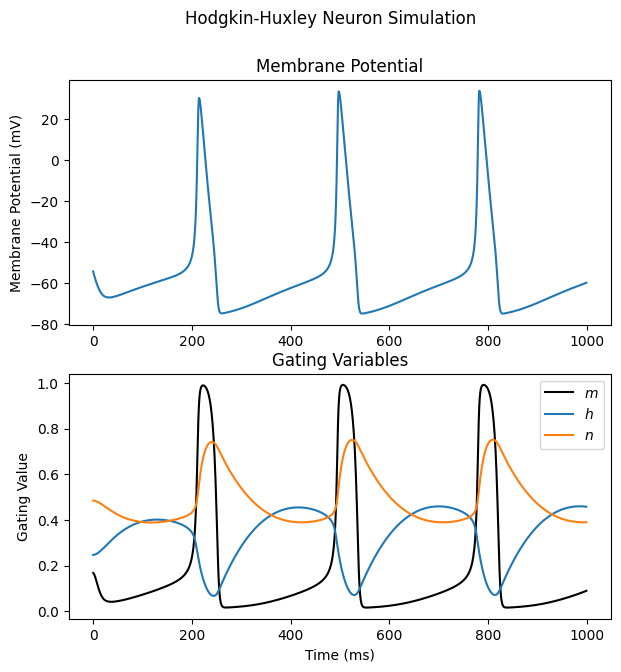

In [444]:
x = hh_neuron_simulation(HH_neuron, 10, 1000)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Hodgkin-Huxley Neuron Simulation')
ax1.plot(x[0], label='Membrane Potential')
ax1.set_title('Membrane Potential')
ax1.set_ylabel('Membrane Potential (mV)')

ax2.set_title('Gating Variables')
ax2.plot(x[1], label=r'$m$', color='black')
ax2.plot(x[2], label=r'$h$')
ax2.plot(x[3], label=r'$n$')
ax2.legend(loc='upper right')
ax2.set_ylabel('Gating Value')
ax2.set_xlabel('Time (ms)')
fig.set_size_inches(7, 7)
plt.show()
#plt.savefig('hh_neuron_simulation_I10.png')

In [445]:
x[0][196]

-50.09775721577448

### 2.2

Increase the injected current I from I = 0 to I = 10. At which value does the neuron start to spike repetitively? What is its lowest firing rate? What happens at the spiking threshold?

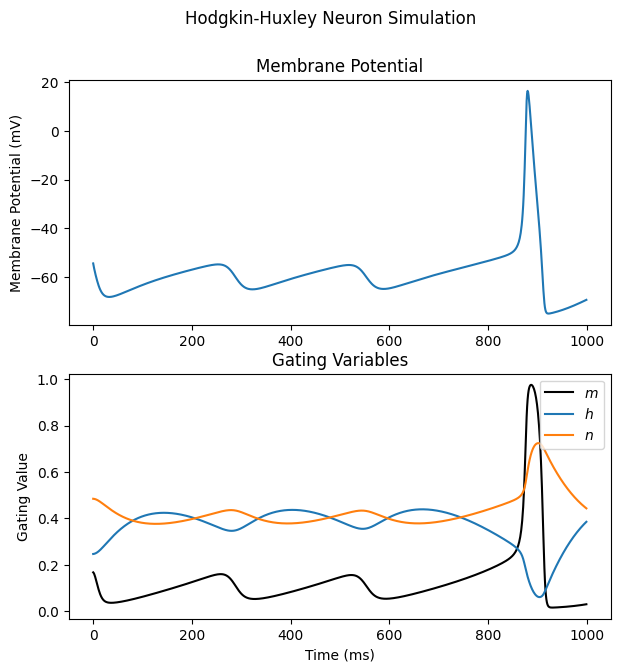

In [446]:
y = hh_neuron_simulation(HH_neuron, 7.967727, 1000)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Hodgkin-Huxley Neuron Simulation')
ax1.plot(y[0], label='Membrane Potential')
ax1.set_title('Membrane Potential')
ax1.set_ylabel('Membrane Potential (mV)')

ax2.set_title('Gating Variables')
ax2.plot(y[1], label=r'$m$', color='black')
ax2.plot(y[2], label=r'$h$')
ax2.plot(y[3], label=r'$n$')
ax2.legend(loc='upper right')
ax2.set_ylabel('Gating Value')
ax2.set_xlabel('Time (ms)')
fig.set_size_inches(7, 7)
plt.show()
#plt.savefig('hh_neuron_simulation_I7.97.png')


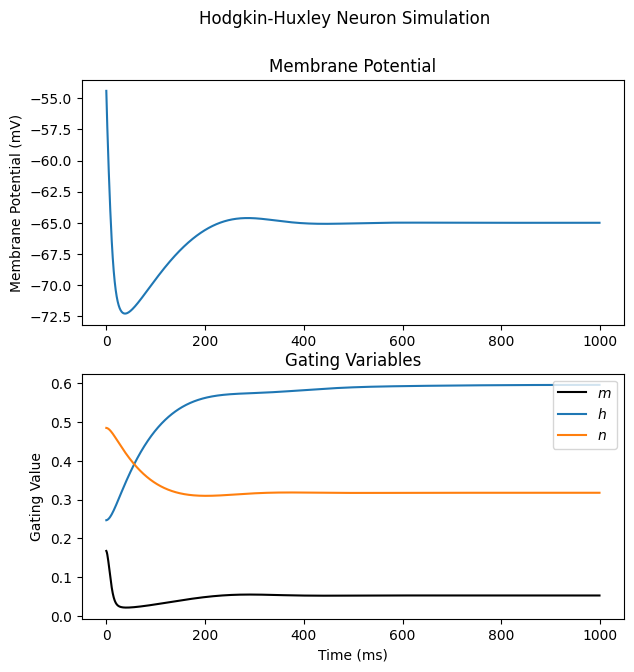

In [447]:
z = hh_neuron_simulation(HH_neuron, 0, 1000)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Hodgkin-Huxley Neuron Simulation')
ax1.plot(z[0], label='Membrane Potential')
ax1.set_title('Membrane Potential')
ax1.set_ylabel('Membrane Potential (mV)')

ax2.set_title('Gating Variables')
ax2.plot(z[1], label=r'$m$', color='black')
ax2.plot(z[2], label=r'$h$')
ax2.plot(z[3], label=r'$n$')
ax2.legend(loc='upper right')
ax2.set_ylabel('Gating Value')
ax2.set_xlabel('Time (ms)')
fig.set_size_inches(7, 7)
plt.show()
#plt.savefig('hh_neuron_simulation_I0.png')


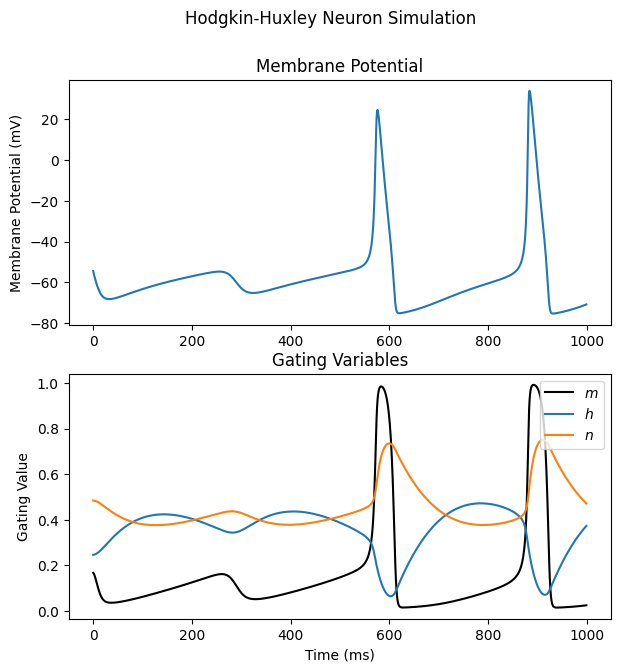

In [448]:
z = hh_neuron_simulation(HH_neuron, 7.974, 1000)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('Hodgkin-Huxley Neuron Simulation')
ax1.plot(z[0], label='Membrane Potential')
ax1.set_title('Membrane Potential')
ax1.set_ylabel('Membrane Potential (mV)')

ax2.set_title('Gating Variables')
ax2.plot(z[1], label=r'$m$', color='black')
ax2.plot(z[2], label=r'$h$')
ax2.plot(z[3], label=r'$n$')
ax2.legend(loc='upper right')
ax2.set_ylabel('Gating Value')
ax2.set_xlabel('Time (ms)')
fig.set_size_inches(7, 7)
plt.show()
#plt.savefig('hh_neuron_simulation_I7.974.png')